# Programming for Data Analysis

## Project
<br/>

#### Lecturer: Brian McGinley

#### Student: Damien Connolly

#### Student number: G00340321
<br/>

**************************************************************************************************************************

#### Introduction

The aim of this project is to create a dataset by simulating a real-world phenomenon. It was important when selecting a database to ensure the dataset created can be measured and created using the numpy random package. 


### Task:
Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

Investigate the types of variables involved, their likely distributions, and their relationships with each other.

Synthesise/simulate a data set as closely matching their properties as possible.

Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.
****************************************************************************************************************************
<br/>

I have chosen to simulate data about homeless persons in Ireland between the ages 15 - 64. I have chosen the following variables:

* Gender

* Age

* Location

* Accomodation Type

The statistics used in this project can be found here: https://www.cso.ie/en/releasesandpublications/ep/p-cp5hpi/cp5hpi/hpi/

*****************************************************************************************************************************

The Central Statistics Office (CSO) is Ireland's national statistical office and its purpose is to impartially collect, analyse and make available statistics about Ireland’s people, society and economy. At national level, CSO official statistics inform decision making across a range of areas including construction, health, welfare, the environment and the economy. At European level they provide an accurate picture of Ireland’s economic and social performance and enable comparisons between Ireland and other countries [1]. 

The homeless persons in Ireland stats used for this project are taken from the 2016 census. Of the 4,761,865 persons enumerated in the State on Census Night, April 24 2016, 6,906 were either counted in accommodation providing shelter for homeless persons or were identified sleeping rough [1]. 





In [1]:
# Import libraries used in this notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams

# Magic command to ensure that plots render inline [https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline]
%matplotlib inline

# Set seaborn style
# Use darkplot plot style for contrast
sns.set_style("darkgrid")
# Set the default colour palette
sns.set_palette("colorblind")
rcParams['figure.figsize'] = 11.7,8.27

In [2]:
# Create empty dataframe
#df = pd.DataFrame()

### Variables
***************************************************************************************************************************

#### Gender

According to the figures 6,906 people in total were counted to be homeless on census night in 2016. Males accounted for 4,018 of those people while the total number of females was 2,888 [1]. 

For the purpose of this project I will be looking at people between the ages of 15 and 64. The age profile statistics provided allow us to remove the people outside of the specified age range easily. The total number of people between the ages 15 - 64 to be simulated will be 4,969. This includes 2,980 males and 1,989 females, meaning males account for approximately 60% and females 40%.  

In order to simulate an accurate number of both genders I have decided to use the numpy.random.choice function. This allows us to distribute the data to match the real world figures and it can also return a string which is useful when there are no numerical values involved. 

In [3]:
# Set the random seed so the numbers will stay the same each time the cell is executed
np.random.seed(1234) 

# Define the gender variables
choice = ["Male", "Female"]

# Simulate the gender
gender = np.random.choice(choice, 4969, p=[0.599, 0.401])


<function matplotlib.pyplot.show(*args, **kw)>

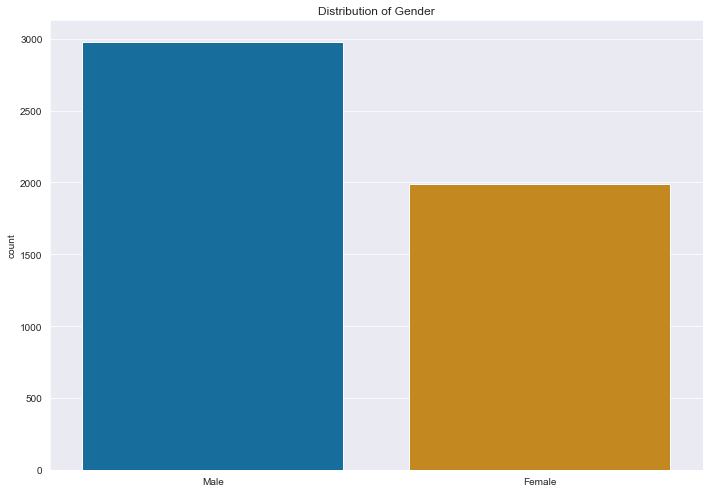

In [4]:
sns.countplot(x=gender)
plt.title('Distribution of Gender')
plt.show

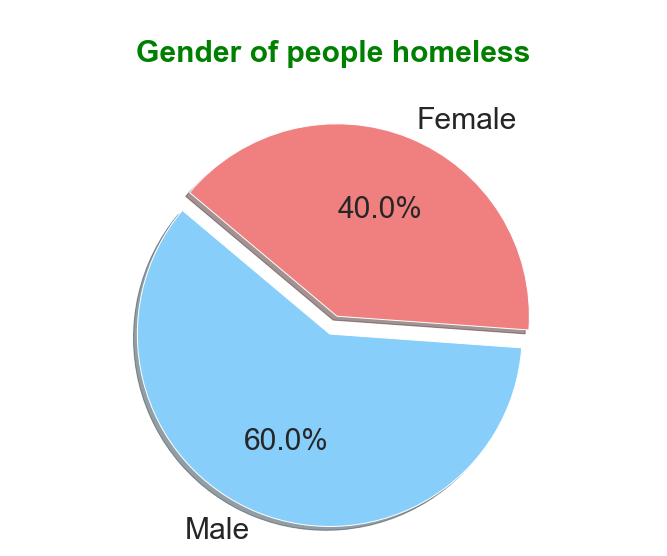

In [5]:
# Visualise the data on a pie-chart [https://pythonspot.com/matplotlib-pie-chart/]

# Data to plot
labels = 'Male', 'Female'
slices_gender = [0.5997, 0.4003]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(slices_gender, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 30})
plt.title("\nGender of people homeless\n", fontweight="bold", fontsize="30", color="g")

plt.axis('equal')
plt.show()

This distribution looks good. We can see from the distribution plot that the number of males (2980) is just below 3000 and the number of females (1989) just below 2000. The pie-chart also shows that the number of males and females has been distributed correctly. 

In [6]:
# Begin to create the dataset by adding Gender
df = pd.DataFrame(data={"Gender": gender})
df

,Gender
0,Male
1,Female
2,Male
3,Female
4,Female
...,...
4964,Male
4965,Male
4966,Female
4967,Male


#### Age Group

According to the CSO, the homeless population tended to be younger than the general population. The average age of a homeless person was 30.5 years compared to the higher 37.4 average age for the general population. There were 4,464 homeless persons in the age group 20-59, accounting for 64.6 per cent of the total homeless count. The corresponding proportion for the overall population of the State was 54.1 per cent. The average age for females was 26.8 years compared with the higher 33.2 years for males. This contrasted with the general population where the average female age was 38.0 years compared with the lower average age of 36.7 years for males [1].


In [7]:
# View age data
agefile = pd.read_excel("ageStatsTotal.xlsx")
agefile

,Age-group,Male,Female,Total
0,0-4,379,386,765
1,5-9,292,273,565
2,10-14,190,174,364
3,15-19,165,170,335
4,20-24,286,335,621
5,25-29,355,375,730
6,30-34,381,297,678
7,35-39,436,263,699
8,40-44,384,198,582
9,45-49,348,151,499


In [8]:
# Remove final total row for plotting purposes
af = agefile.drop([16])

Text(0.5, 1.0, 'Distribution of Ages')

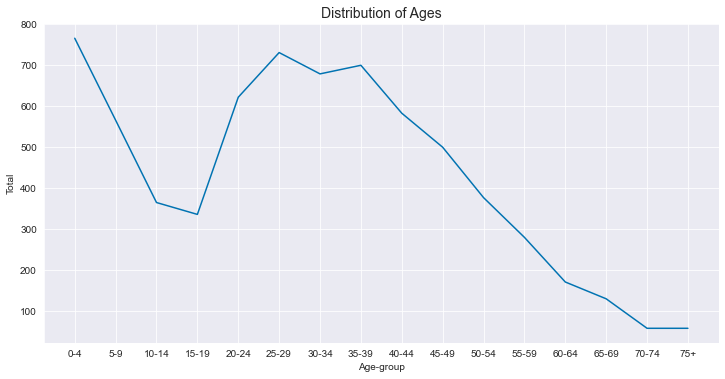

In [9]:
# Plot the total to visualise the age distribution
sns.relplot(x="Age-group", y="Total", kind="line", data=af, height=5, aspect=2) # Use aspect to make plot wider
plt.xlabel('Age-group')
plt.ylabel('Total')
plt.title('Distribution of Ages', fontsize=14)

As stated before we are looking only at people within the age range 15 - 64. By looking at the distribution starting from the age of 15 up to 64, it seems likely that the distribution could be replicated using a triangular distribution. The triangular distribution is a continuous probability distribution with lower limit left, peak at mode, and upper limit right [2]. It should be possible to simulate the distribution using these parameters.

* Lower limit: The Starting point of the triangle. We will be starting from 15.


* Mode: The highest frequency i.e. the age with the greatest proportion of the population. From the stats we can see that the age-range 24 - 29 has the highest number of males and females combined accounting for 730. So for the purpose of this project I will set the mode to 27. 


* Upper limit: The Ending point of the triangle. 64 in this case.

In [10]:
# Simulate ages

# Set the seed
np.random.seed(1)

# Set the parameters and generate ages using the triangular distribution
age = np.random.triangular(15, 27, 64, 4969)

# Print the min, max and median age generated from the array
print("The minimum age is :", min(age),"\nThe maximum age is :", max(age),"\nThe median age is  :", np.median(age))

The minimum age is : 15.238761396278328 
The maximum age is : 63.52545060545586 
The median age is  : 33.97701892414525


Text(0.5, 1.0, 'Distribution of Ages')

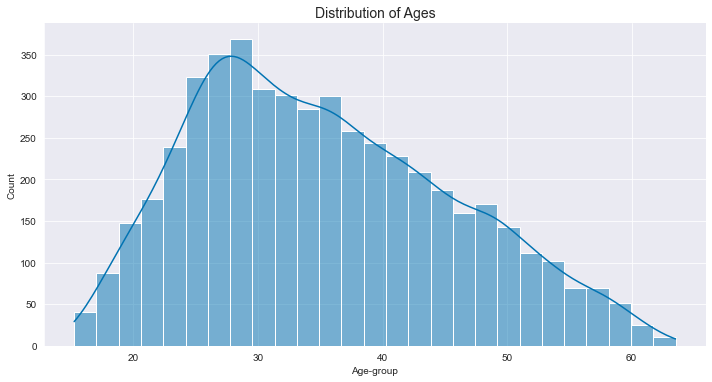

In [11]:
# Plot distribution
sns.displot(kde="line", data=age, aspect = 2)
plt.xlabel('Age-group')
plt.ylabel('Count')
plt.title('Distribution of Ages', fontsize=14)

The distribution created above looks fairly similar to the original distribution. This array currently contains floats, I can easily round them off to their nearest integer using np.rint. 

In [12]:
# Round off to nearest integer
fAge = np.rint(age)

# Print the min, max and median age generated from the array
print("The minimum age is :", min(fAge),"\nThe maximum age is :", max(fAge),"\nThe median age is  :", np.median(fAge))

The minimum age is : 15.0 
The maximum age is : 64.0 
The median age is  : 34.0


In [13]:
# Add Age to the dataframe
df['Age'] = fAge

In [14]:
# View dataframe
df

,Gender,Age
0,Male,31.0
1,Female,41.0
2,Male,15.0
3,Female,28.0
4,Female,24.0
...,...,...
4964,Male,40.0
4965,Male,51.0
4966,Female,28.0
4967,Male,54.0


#### Location

The table below shows the distribution of homeless persons by region. The results show that 72.5 percent of the people who were homeless were based in Dublin. This accounted for 5,009 people, of that amount 55.9 percent or 2,802 were male. The next largest region was the South West. Of the 471 homeless persons enumerated in this region, 285 were male [1].

In [15]:
# View location data
ls = pd.read_csv("location.stats.csv")
ls

,Region,Male,Female,Total
0,Dublin,2802,2207,5009
1,South West,285,186,471
2,Mid West,265,131,396
3,South East,203,120,323
4,Mid East,163,68,231
5,West,119,70,189
6,North East,100,53,153
7,Midland,50,44,94
8,North West,31,9,40
9,Total,4018,2888,6906


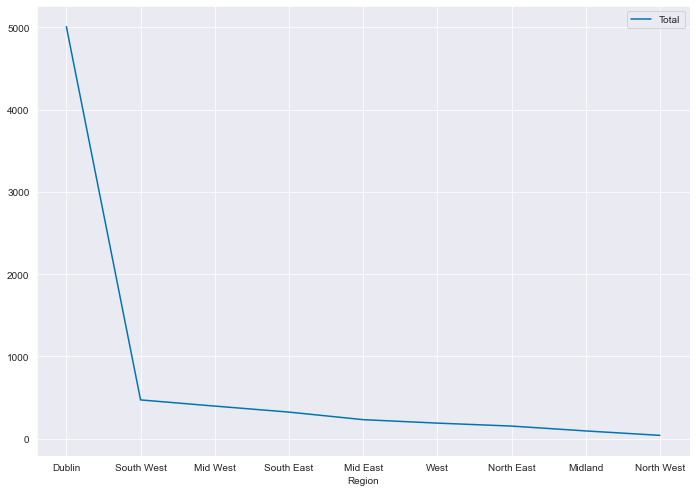

In [16]:
# Drop row 9 (Total) for plotting purposes
locStat = ls.drop([9])

# Create plot
locStat.plot(x='Region', y='Total', kind = 'line')

From the distribution it is clear to see that Dublin contains the majority of the homeless people at 72.5%. This distribution could be difficult to replicate due to such a big fall off to the rest of the regions. In order to simulate this data I will use the numpy.random.choice function and select items from a list based on the correct probability. Numpy.random.choice takes an array as a parameter and randomly returns one of its values, it can also be used to return multiple values. This is uselful when you want to choose multiple items from a particular list [3].  

In [38]:
# Set the location variables
location = ['Dublin', 'South West', 'Mid West', 'South East', 'Mid East', 'West', 'North East', 'Midlands', 'North West']

# Set the parameters and generate array with locations
loc = np.random.choice(location, 4969, p=[0.7251, 0.0683, 0.0574, 0.0467, 0.0334, 0.0274, 0.0222, 0.0137, 0.0058])

# Add location to dataframe
df['Location'] = loc

# View dataframe
df

,Gender,Age,Location,AccomodationType
0,Male,31.0,Dublin,In Accomodation
1,Female,41.0,Midlands,In Accomodation
2,Male,15.0,South West,In Accomodation
3,Female,28.0,West,In Accomodation
4,Female,24.0,South West,In Accomodation
...,...,...,...,...
4964,Male,40.0,South West,In Accomodation
4965,Male,51.0,Dublin,In Accomodation
4966,Female,28.0,South West,In Accomodation
4967,Male,54.0,Dublin,In Accomodation


#### Accomodation Type

Homeless persons were identified based on where they were on Census Night rather than by self-identification. This means that people in Long Term Accommodation (LTA) are excluded from the main results in this report, an approach agreed in advance with all the major stakeholders working in the area of homelessness [1]. In this report people are divided into two categories, Sleeping in accomodation or Sleeping rough. 


In [39]:
# View accomodation data
accType = pd.read_excel("AccomodationType.xlsx")
accType

,Category,Male,Female,Total
0,Persons in accommodation,3914,2869,6783
1,Persons sleeping rough,104,19,123
2,Total,4018,2888,6906


From the table above it is clear to see that males account for most of the rough sleepers. Of the 123 that were included in the report 104 were male while only 19 were female. In order to replicate this data I have decided to use the numpy.random.choice function and try simulate the data using the correct probability for each gender.  

In [40]:
type = ['In Accomodation', 'Sleeping Rough']

for idx, val in enumerate(df.itertuples()):
    if df.Gender[idx] == "Male":
            df.loc[idx, 'AccomodationType'] = np.random.choice(type, p=[0.9740, 0.0260]) 
    elif df.Gender[idx] == "Female":
            df.loc[idx, 'AccomodationType'] = np.random.choice(type, p=[0.9934, 0.0066]) 


In [41]:
df

,Gender,Age,Location,AccomodationType
0,Male,31.0,Dublin,In Accomodation
1,Female,41.0,Midlands,In Accomodation
2,Male,15.0,South West,In Accomodation
3,Female,28.0,West,In Accomodation
4,Female,24.0,South West,In Accomodation
...,...,...,...,...
4964,Male,40.0,South West,In Accomodation
4965,Male,51.0,Dublin,In Accomodation
4966,Female,28.0,South West,In Accomodation
4967,Male,54.0,Dublin,In Accomodation


### Assesment of simulated data


In [42]:
# Check count for males and females
df['Gender'].value_counts() 

Male      2980
Female    1989
Name: Gender, dtype: int64

The count above is correct for males and females

In [43]:
# Count each unique value within the column
df['Age'].value_counts()

27.0    216
28.0    211
26.0    195
29.0    194
30.0    180
32.0    176
36.0    174
31.0    174
34.0    165
35.0    164
25.0    157
24.0    156
33.0    148
37.0    144
38.0    141
40.0    139
43.0    132
39.0    132
23.0    131
41.0    128
42.0    117
45.0    110
49.0    105
22.0    103
44.0     94
46.0     94
21.0     92
48.0     91
20.0     84
47.0     83
19.0     74
50.0     72
51.0     72
53.0     70
52.0     61
54.0     51
18.0     50
57.0     41
58.0     40
56.0     40
17.0     36
55.0     35
59.0     24
60.0     23
16.0     18
62.0     15
61.0     11
15.0      5
64.0      1
Name: Age, dtype: int64

27 has the highest number of people at that age as it was set as the mode when the data was been simulated. The highest number overall comes in the 26 - 30 age bracket matching that of the original age data. 

In [44]:
df['Age'].mean()

35.308512779231236

The mean age of the simulated dataset is 35.3. According to the CSO the average age across the whole age range was 30.5 but since I simulated only the ages ranging from 15 to 64, a slight variation in the mean is to be expected. 

In [45]:
df['Location'].value_counts()

Dublin        3605
South West     329
Mid West       273
South East     233
Mid East       161
West           153
North East     114
Midlands        66
North West      35
Name: Location, dtype: int64

According the the stats Dublin accounted for 72.5 percent of the total number of homeless people. The simulated data returns the same percentage with 3,605 being 72.5 percent of the total number simulated. The rest of the list is also distributed matching the original figures. 

In [46]:
df['AccomodationType'].value_counts()

In Accomodation    4875
Sleeping Rough       94
Name: AccomodationType, dtype: int64

In the original data people sleeping rough accounted for 1.8 percent of homeless people, the simiulated data returned the same amount with 94 people sleeping rough. 

In [47]:
# Group by Gender value
dfGen = df.groupby('Gender') 

In [50]:
dfGen['Location'].value_counts()

Gender  Location  
Female  Dublin        1433
        South West     149
        Mid West       111
        South East      92
        West            62
        Mid East        56
        North East      44
        Midlands        28
        North West      14
Male    Dublin        2172
        South West     180
        Mid West       162
        South East     141
        Mid East       105
        West            91
        North East      70
        Midlands        38
        North West      21
Name: Location, dtype: int64

This table is very alike to the original dataset with a similar distribtion across the locations. 

In [58]:
dfGen['AccomodationType'].value_counts()

Gender  AccomodationType
Female  In Accomodation     1977
        Sleeping Rough        12
Male    In Accomodation     2898
        Sleeping Rough        82
Name: AccomodationType, dtype: int64

The values are relatively close to what I would expect them to be.

### Conclusion

In [63]:
df

,Gender,Age,Location,AccomodationType
0,Male,31.0,Dublin,In Accomodation
1,Female,41.0,Midlands,In Accomodation
2,Male,15.0,South West,In Accomodation
3,Female,28.0,West,In Accomodation
4,Female,24.0,South West,In Accomodation
...,...,...,...,...
4964,Male,40.0,South West,In Accomodation
4965,Male,51.0,Dublin,In Accomodation
4966,Female,28.0,South West,In Accomodation
4967,Male,54.0,Dublin,In Accomodation
